**HW 1**    
  
Friday 01/31/2025  
DS 3001 Spring 2025  
Teresa Duong  

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Task 1: Bernoulli Simulation

1. Objective: Perform a series of Bernoulli simulations (varying two values described below) and visualizations of the sample mean.

2. Instructions:

First Variable: Number of observations in a single simulation, with values [10, 100, 1000, 10000].
Second Variable: Number of times to run a Bernoulli simulation (with p=0.7) for each set of observations, with values [10, 100, 1000, 10000].
For each combination of values, simulate the dataset. For each combination of variables, record the sample mean for each run as its own dataset. Example: For 100 runs of a 10 observation Bernoulli dataset, generate a dataset where each of the 100 rows consists of the sample mean from a different run with 10 observations.
Submit each of these sample mean datasets as a separate CSV file. Each file should contain one mean per line.

3. Visualization and Interpretation:

Produce a visualization of the distribution of sample means for each dataset created.
Include a brief commentary as a comment in your Python notebook about the trends you observe as the number of runs and number of observations vary.

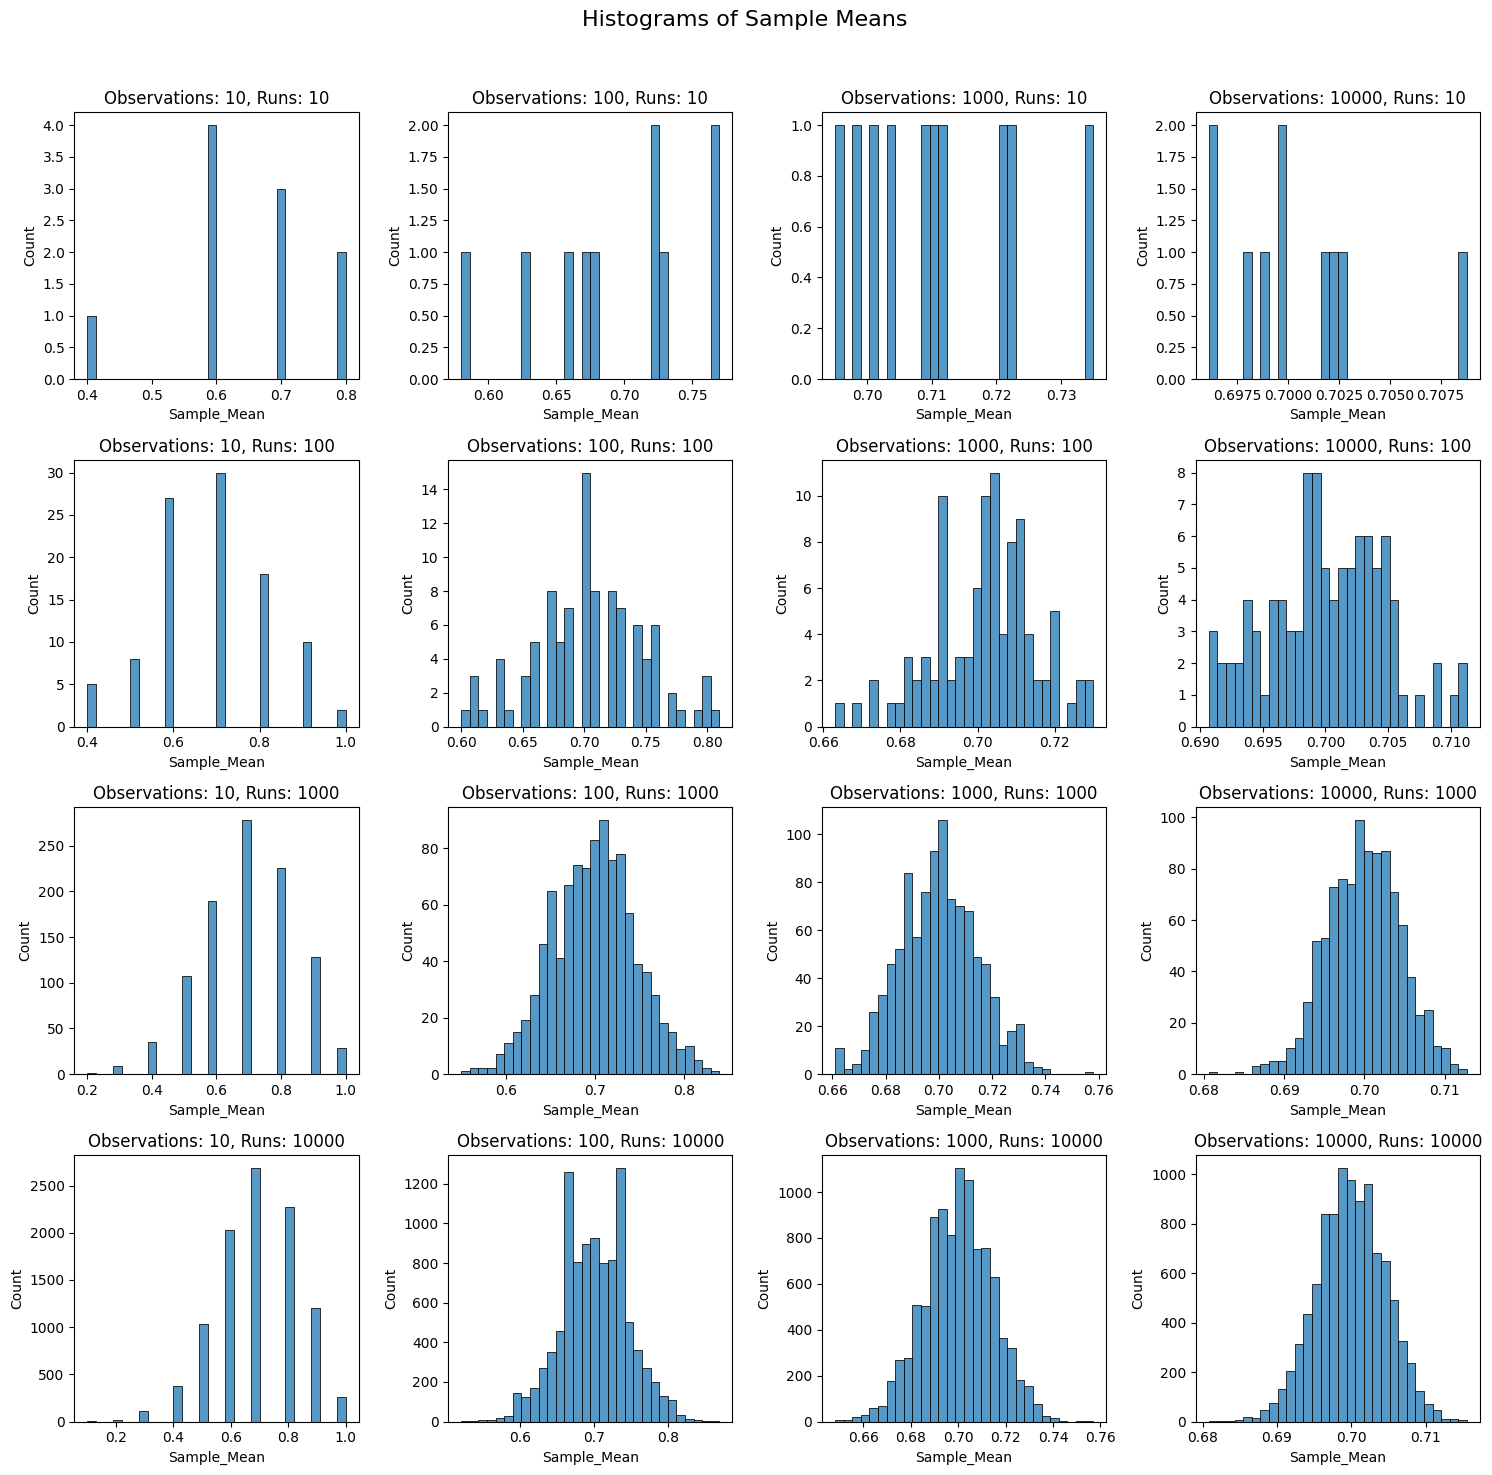

In [3]:
observations_list = [10, 100, 1000, 10000]
p = 0.7
runs_list = [10, 100, 1000, 10000]

for runs in runs_list:
    for observations in observations_list:
        sample_means = []
        for i in range (0,runs):
            sample = stats.bernoulli.rvs(p, size = observations)
            sample_mean = np.mean(sample)
            sample_means.append(np.mean(sample))
        df = pd.DataFrame({'Sample_Mean': sample_means})
        filename = f"observations{observations}runs{runs}dataset.csv"
        df.to_csv(filename, index=False)
        #display(df)

# Visualizations and Interpretation
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Histograms of Sample Means", fontsize=16)

for i, runs in enumerate(runs_list):
    for j, observations in enumerate(observations_list):
        filename = f"observations{observations}runs{runs}dataset.csv"
        df = pd.read_csv(filename)
        
        ax = axes[i, j] 
        sns.histplot(df['Sample_Mean'], bins=30, ax=ax)
        ax.set_title(f"Observations: {observations}, Runs: {runs}")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Commentary:
# I saw that with a greater number of runs and a greater number of observations in each run, the distribution approached a more normal curve with the sample mean approaching 0.7, 
# our set p. One trend that was interesting to me was that the dataset with the largest number of runs and smallest number of observations had a more normal distribution than the 
# dataset with the largest number of observations and smallest number of runs.

Task 2: Analysis of `HW1_dataset1.csv`

1. Visualization:

Create at least one visualization to depict the feature(s) in this dataset.

2. Distribution Modeling:

Select a distribution that you believe models the feature effectively.
Justify your choice in a comment block within your notebook.

3. Parameter Estimation:

Estimate the parameters of your chosen distribution based on the data.
Overlay the estimated distribution on your data visualization fn. comparison.

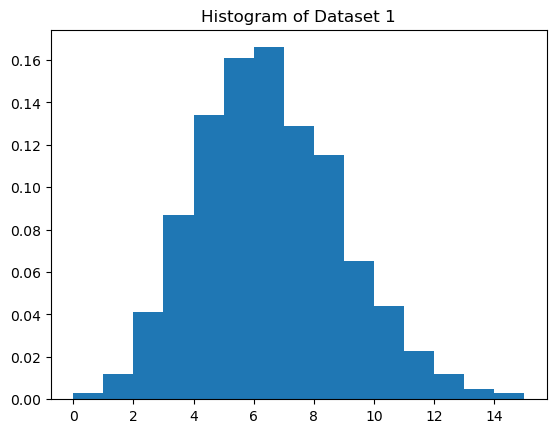

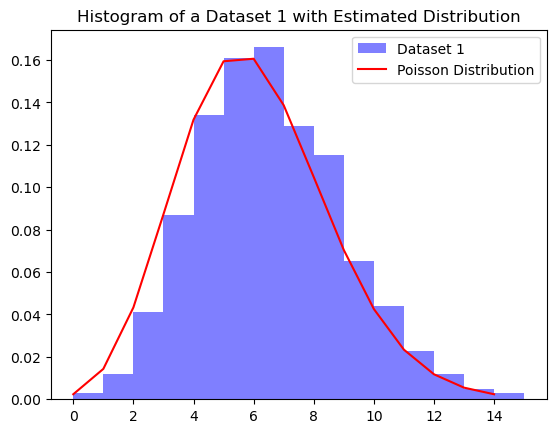

In [71]:
dataset1 = pd.read_csv('HW1_dataset1.csv')
#display(len(dataset1))
#display (dataset1)

#1. Visualization - Histogram
plt.title("Histogram of Dataset 1")
plt.hist(dataset1, bins=15, density=True)
plt.show()
plt.close()

#2. Distribution Modeling - Poisson
# I believe the Poisson distribution models the feature effectively. The Poisson distribution shows the distribution of the probabilities of an event 
# happening x number of times. This means that the Poisson distribution can be skewed to the right because a negative x, or occurrence of the event, 
# is not possible (the left side of the distribution will stop at 0) while an infinitely high x is possible (the right side can have a long tail), 
# although less and less likely as it goes higher. 

#3. Parameter Estimation
plt.title("Histogram of a Dataset 1 with Estimated Distribution")
plt.hist(dataset1, bins=15, density=True, alpha=0.5, color='blue', label='Dataset 1')
dataset1_mean = np.mean(dataset1)
x_max=15
x = np.arange(0,x_max)
plt.plot(x, stats.poisson.pmf(x, dataset1_mean), color = 'red', label = 'Poisson Distribution')
plt.legend()
plt.show()
plt.close()

Task 3: Analysis of `HW1_dataset2.csv`

Instructions are identical to Task 2. Follow the same steps for `HW1_dataset2.csv`.

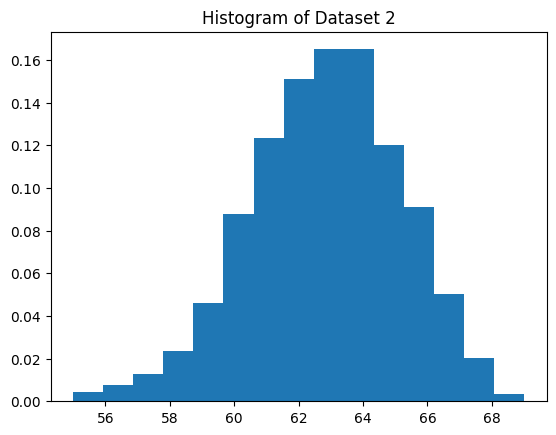

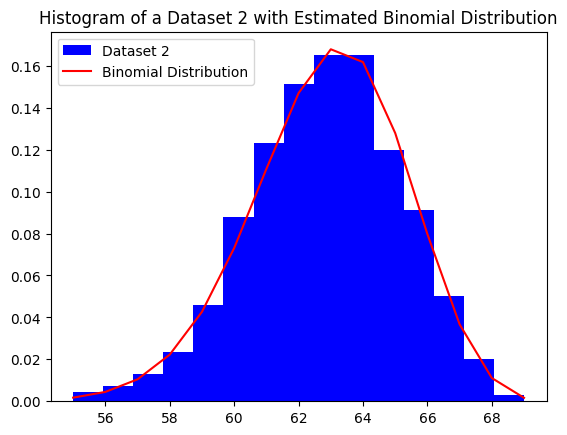

In [4]:
dataset2 = pd.read_csv('HW1_dataset2.csv')
# display (dataset2)

# 1. Visualization - Histogram
plt.title("Histogram of Dataset 2")
plt.hist(dataset2, bins=15, density=True)
plt.show()
plt.close()

# 2. Distribution Modeling - Binomial
# I believe the binomial distribution models the feature effectively. The feature in this problem is left-skewed with more density on the left side.
# I ruled out the possibility of a Gaussian model because a Gaussian is symmetric, and I ruled out the possibility of a Poisson model because a
# Poisson is usually a right-skewed distribution. I realized a binomial distribution with a p > 0.5 could be left-skewed, however.

# 3. Parameter Estimation
from scipy.stats import binom 
plt.title("Histogram of a Dataset 2 with Estimated Binomial Distribution")
plt.hist(dataset2, bins=15, density=True, color='blue', label = "Dataset 2")
n = 69
dataset2_mean = np.mean(dataset2)
p = dataset2_mean/69
r_values = list(range(55,70)) 
dist = [binom.pmf(r, n, p) for r in r_values ] 
plt.plot(r_values, dist, color = 'red', label = 'Binomial Distribution')
plt.legend()
plt.show()
plt.close()

Task 4: Visualization of `HW1_dataset3.csv`

1. Objective:

Generate a meaningful and clear visualization of the two-feature dataset contained in `HW1_dataset3.csv`.

2. Visualization Considerations:

Your visualization should be informative, showing relationships or patterns between the two features.
Ensure clarity and effectiveness in conveying the data insights.

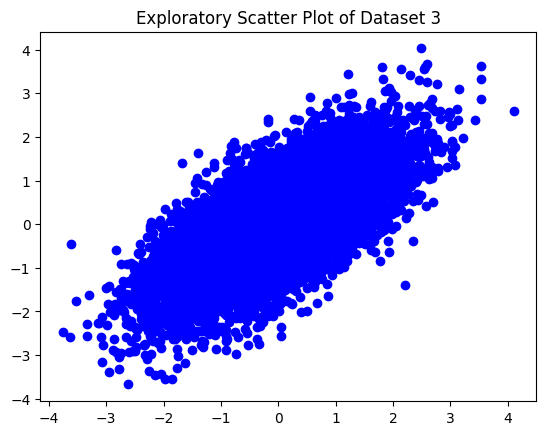

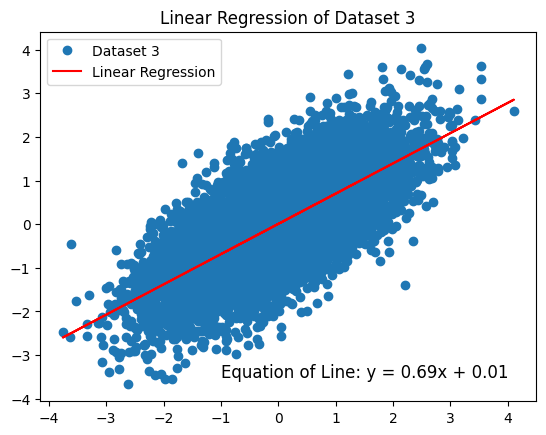

In [5]:
# The visualization I chose for this task is a linear regression plot. This is because the data
# appeared to have a positive linear slope throughout its entire range when I originally plotted it
# on a scatter plot.

dataset3 = pd.read_csv('HW1_dataset3.csv')
# display (dataset3)
x = dataset3['X']
y = dataset3['Y']

# Exploratory Scatter Plot
plt.title("Exploratory Scatter Plot of Dataset 3")
plt.scatter(x,y, color = 'blue')
plt.show()
plt.close()

# Linear Regression
res = stats.linregress(x,y)
plt.title ("Linear Regression of Dataset 3")
plt.plot(x, y, 'o', label='Dataset 3')
plt.plot(x, res.intercept + res.slope*x, 'red', label='Linear Regression')
plt.legend()
plt.text(-1,-3.5, f"Equation of Line: y = {res.slope:.2f}x + {res.intercept:.2f}", fontsize=12)
plt.show()
plt.close()

In [6]:
pip freeze > hw1_requirements.txt

Note: you may need to restart the kernel to use updated packages.
